# Problem 1 (Practice)

In the lectures, we learned about the forward-time centered-space (FTCS) method. Here we will actually implement this method to solve the heat diffusion equation, and compare the stationary solution to that obtained using the relaxation method.

The heat diffusion equation is
\begin{align*}
  \frac{\partial\phi(x,y,t)}{\partial t} = D \nabla^2\phi(x,y,t),
\end{align*}
where $\nabla^2 = \partial^2/\partial x^2 + \partial^2/\partial y^2$.

(a) Show, using the von Neumann stability analysis, that for two spatial dimensions, numerical stability requires
\begin{align*}
  \Delta t < \frac{\Delta r^2}{2D},
\end{align*}
where
\begin{align*}
  \frac{1}{\Delta r^2} = \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}.
\end{align*}
(15 pts)

The two-dimensional heat diffusion equation is given by this
$$
\frac{\partial \phi}{\partial t} = D \left( \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \right)
$$

We must discretize this equation using the FTCS method.

Let $\phi^n_{j,k}$ be the value of $\phi$ at time $t_n = n \Delta t$ and grid point $(x_j, y_k) = (j \Delta x, k \Delta y)$. The FTCS equation gives that
$$
\frac{\phi^{n+1}_{j,k} - \phi^n_{j,k}}{\Delta t} = D \left( \frac{\phi^n_{j+1,k} - 2\phi^n_{j,k} + \phi^n_{j-1,k}}{(\Delta x)^2} + \frac{\phi^n_{j,k+1} - 2\phi^n_{j,k} + \phi^n_{j,k-1}}{(\Delta y)^2} \right)
$$

Then,
$$
\phi^{n+1}_{j,k} = \phi^n_{j,k} + D \Delta t \left( \frac{\phi^n_{j+1,k} - 2\phi^n_{j,k} + \phi^n_{j-1,k}}{(\Delta x)^2} + \frac{\phi^n_{j,k+1} - 2\phi^n_{j,k} + \phi^n_{j,k-1}}{(\Delta y)^2} \right)
$$

Let's conduct von Neumann stability analysis, from the discretization of equation, we consider the solution at a given time step $n$ has the form of
$$
\phi^n_{j,k} = G^n e^{i(q_x j \Delta x + q_y k \Delta y)}
$$
where $q_x$ and $q_y$ are the wave numbers in the $x$ and $y$ directions and $G = G(q_x, q_y)$ is the amplification factor per time step, which must satisfy $|G| \le 1$ because for the solution remain in stable.

Substituting this Fourier mode into the FTCS heat diffusion equation:
$$
G^{n+1} e^{i(q_x j \Delta x + q_y k \Delta y)} = G^n e^{i(q_x j \Delta x + q_y k \Delta y)} + D \Delta t \left( \frac{G^n e^{i(q_x (j+1) \Delta x + q_y k \Delta y)} - 2G^n e^{i(q_x j \Delta x + q_y k \Delta y)} + G^n e^{i(q_x (j-1) \Delta x + q_y k \Delta y)}}{(\Delta x)^2} + \frac{G^n e^{i(q_x j \Delta x + q_y (k+1) \Delta y)} - 2G^n e^{i(q_x j \Delta x + q_y k \Delta y)} + G^n e^{i(q_x j \Delta x + q_y (k-1) \Delta y)}}{(\Delta y)^2} \right)
$$

Then,
$$
G = 1 + \frac{D \Delta t}{(\Delta x)^2} (e^{iq_x \Delta x} - 2 + e^{-iq_x \Delta x}) + \frac{D \Delta t}{(\Delta y)^2} (e^{iq_y \Delta y} - 2 + e^{-iq_y \Delta y})
$$

We know, from the Euler's equation, $e^{iq_x \Delta x} - 2 + e^{-iq_x \Delta x} = 2\cos(q_x \Delta x) - 2 = -2(1-\cos(q_x \Delta x)) = -4\sin^2\left(\frac{q_x \Delta x}{2}\right)$.
Similarly for the $y$ term. Substituting these back into the equation then,
$$
G = 1 - 4D \Delta t \left( \frac{\sin^2(q_x \Delta x / 2)}{(\Delta x)^2} + \frac{\sin^2(q_y \Delta y / 2)}{(\Delta y)^2} \right)
$$

From the stability condition, $|G| \le 1$, $-1 \le G \le 1$, since the term being subtracted from 1 is always non-negative, $G \le 1$ is always satisfied.
We must check $G \ge -1$
$$
-1 \le 1 - 4D \Delta t \left( \frac{\sin^2(q_x \Delta x / 2)}{(\Delta x)^2} + \frac{\sin^2(q_y \Delta y / 2)}{(\Delta y)^2} \right)
$$
$$
4D \Delta t \left( \frac{\sin^2(q_x \Delta x / 2)}{(\Delta x)^2} + \frac{\sin^2(q_y \Delta y / 2)}{(\Delta y)^2} \right) \le 2
$$
$$
\Delta t \le \frac{1}{2D \left( \frac{\sin^2(q_x \Delta x / 2)}{(\Delta x)^2} + \frac{\sin^2(q_y \Delta y / 2)}{(\Delta y)^2} \right)}
$$

This condition must hold for all possible wave numbers $q_x, q_y$. Denominator is maximized when $\sin^2(\cdot) = 1$.
$$
\Delta t \le \frac{1}{2D \left( \frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2} \right)}
$$

Define $\frac{1}{\Delta r^2} = \frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}$, then the stability condition become
$$
\Delta t \le \frac{\Delta r^2}{2D}
$$
Strict inequality $\Delta t < \frac{\Delta r^2}{2D}$ also holds.

Thus, this complete the proof of (a)

(b) Solve the heat diffusion equation using the FTCS method for the domain $(L_x,L_y) = (1,1)$ and $D=0.2$. Choose the boundary conditions $\phi(x,L)=50$ and $\phi(x,0)=\phi(0,y)=\phi(L,y)=0$. Let $\phi=0$ at $t=0$ everywhere except $\phi(x,L)$. Choose an appropriate $\Delta t$ according the above stability condition. Instead of saving at each timestep which may require a large memory or storage space, save $\phi$ to memory every predetermined number of timesteps so that there are 200 temporal data points. Run for $T_{max}=1$. (40 pts)

In [1]:
import numpy as np

# Setting is given in problem
Lx, Ly = 1., 1.
Nx, Ny = 128, 128
dx, dy = Lx/Nx, Ly/Ny

D = 0.2
Tmax = 1.0
# use 0.96 as stable timestep
dr = (dx**-2 + dy**-2)**-0.5
dt = 0.96 * dr**2 / (2*D)
Nt = int(Tmax / dt)

# Save 200 frames
# 50 is boundary condition
save_every = int(Nt/200)
phi = np.zeros((Nx, Ny))
phi[:, -1] = 50.0

# Store history for animation
phi_history = [phi.copy()]

for tstep in range(Nt):
    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history.append(phi.copy())
    
    phi[1:-1, 1:-1] += ((D*dt)/dx**2) * (phi[2:, 1:-1] + 
                                         phi[:-2, 1:-1] +
                                         phi[1:-1, 2:] +
                                         phi[1:-1, :-2] -
                                         4 * phi[1:-1, 1:-1])

Time step 0/13653
Time step 68/13653
Time step 136/13653
Time step 204/13653
Time step 272/13653
Time step 340/13653
Time step 408/13653
Time step 476/13653
Time step 544/13653
Time step 612/13653
Time step 680/13653
Time step 748/13653
Time step 816/13653
Time step 884/13653
Time step 952/13653
Time step 1020/13653
Time step 1088/13653
Time step 1156/13653
Time step 1224/13653
Time step 1292/13653
Time step 1360/13653
Time step 1428/13653
Time step 1496/13653
Time step 1564/13653
Time step 1632/13653
Time step 1700/13653
Time step 1768/13653
Time step 1836/13653
Time step 1904/13653
Time step 1972/13653
Time step 2040/13653
Time step 2108/13653
Time step 2176/13653
Time step 2244/13653
Time step 2312/13653
Time step 2380/13653
Time step 2448/13653
Time step 2516/13653
Time step 2584/13653
Time step 2652/13653
Time step 2720/13653
Time step 2788/13653
Time step 2856/13653
Time step 2924/13653
Time step 2992/13653
Time step 3060/13653
Time step 3128/13653
Time step 3196/13653
Time step 

(c) Using the plt.imshow function, animate the result and save to a mp4 file named 'Heat_equation.mp4'. (10 pts)

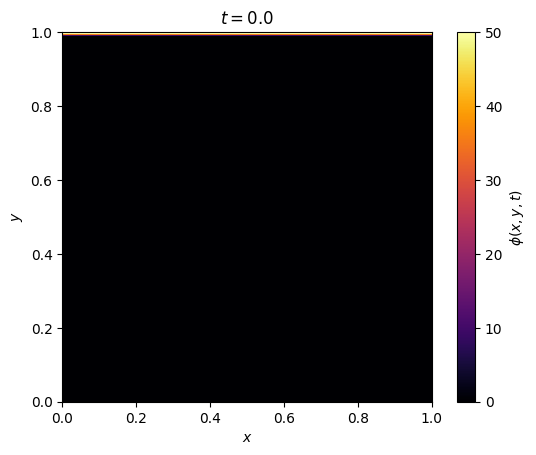

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# animation setup
fig, ax = plt.subplots()
im = ax.imshow(
    phi_history[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='inferno'
)
ax.set_title('$t=0$')
plt.colorbar(im, ax=ax, label='$\phi(x,y,t)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# define update function for animation
def update(i):
    im.set_data(phi_history[i].T)
    ax.set_title(f'$t={(i*dt*save_every):.1f}$')


ani = FuncAnimation(fig, update, frames=len(phi_history), interval=100)
ani.save('Heat_equation.mp4', dpi=300)

(d) Try a timestep that does not satisfy the stability condition, i.e., $1.01 \Delta r^2/2D$ and save the solution to 'Heat_equation_unstable.mp4'. What happens? Typically, a grid-level noise corresponds to numerical instability. (10 pts)

Time step 0/12977
Time step 64/12977
Time step 128/12977
Time step 192/12977
Time step 256/12977
Time step 320/12977
Time step 384/12977
Time step 448/12977
Time step 512/12977
Time step 576/12977
Time step 640/12977
Time step 704/12977
Time step 768/12977
Time step 832/12977
Time step 896/12977
Time step 960/12977
Time step 1024/12977
Time step 1088/12977
Time step 1152/12977
Time step 1216/12977
Time step 1280/12977
Time step 1344/12977
Time step 1408/12977
Time step 1472/12977
Time step 1536/12977
Time step 1600/12977
Time step 1664/12977
Time step 1728/12977
Time step 1792/12977
Time step 1856/12977
Time step 1920/12977
Time step 1984/12977
Time step 2048/12977
Time step 2112/12977
Time step 2176/12977
Time step 2240/12977
Time step 2304/12977
Time step 2368/12977
Time step 2432/12977
Time step 2496/12977
Time step 2560/12977
Time step 2624/12977
Time step 2688/12977
Time step 2752/12977
Time step 2816/12977
Time step 2880/12977
Time step 2944/12977
Time step 3008/12977
Time step 3

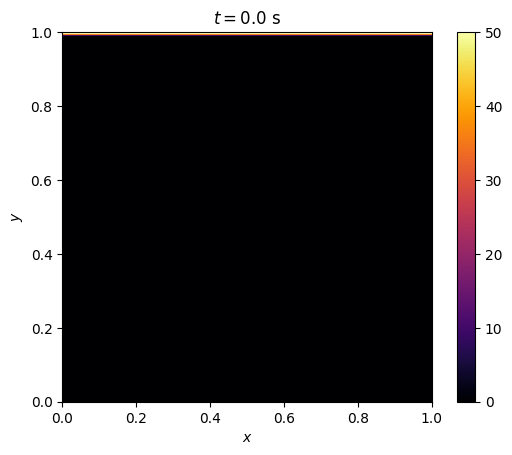

In [3]:
# settup for unstable case
Lx, Ly = 1., 1.
Nx, Ny = 128, 128
dx, dy = Lx/Nx, Ly/Ny
D = 0.2
Tmax = 1.0
dr = (dx**-2 + dy**-2)**-0.5
dt_unstable = (1.01 * dr**2) / (2*D)
Nt = int(Tmax/dt_unstable)

# initialization and simulation
save_every = int(Nt/200)
phi = np.zeros([Nx, Ny])
phi[:,-1] = 50
phi_history_unstable = [phi.copy()]

for tstep in range(Nt):
    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history_unstable.append(phi.copy())
    phi[1:-1,1:-1] += (D * dt_unstable / dx**2) * (phi[2:,1:-1] +
                                                   phi[:-2,1:-1] +
                                                   phi[1:-1,2:] + 
                                                   phi[1:-1,:-2] -
                                                   4*phi[1:-1,1:-1])

# animation setup for unstable case
fig, ax = plt.subplots()
im = ax.imshow(
    phi_history_unstable[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='inferno'
)
ax.set_title('$t=0$')
plt.colorbar(im, ax=ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

def update_unstable(i):
    im.set_data(phi_history_unstable[i].T)
    ax.set_title(f'$t={(i * dt_unstable * save_every):.1f}$ s')

ani = FuncAnimation(fig, update_unstable, frames=len(phi_history_unstable), interval=100)
ani.save('Heat_equation_unstable.mp4', dpi=300)

What Happens

- Grid-level checkerboard patterns (noise) quickly across the domain
- With the unstable timestep, it gets an amplification factor with magnitude > 1, so perturbations at the grid scale grow fastly.
- This grow make observed checkerboard noise

(e) Use the relaxation method to obtain the stationary solution to 16 digits of accuracy below the decimal point. Plot the stationary solution, the solution at the final timestep from the FTCS method, and the difference between the to on the same figure. Can you say that the FTCS solution has reached a steady state? (25 pts)

Solution converged after 100631 iterations.


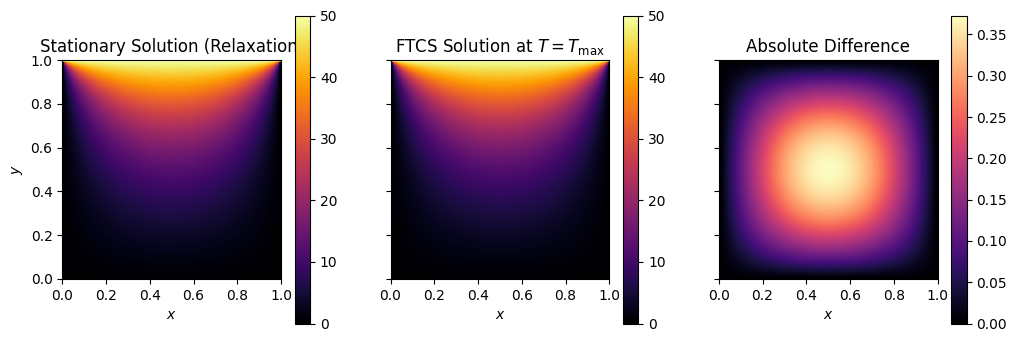

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# init setup given in problem
Nx, Ny = 128, 128
Lx, Ly = 1., 1.

phi_stationary = np.zeros([Nx, Ny])
phi_stationary[:, -1] = 50.0
phi_prev = phi_stationary.copy()

N_iter = int(1e7)
eps = 1e-16

for i in range(N_iter):
    phi_stationary[1:-1,1:-1] = (phi_prev[2:,1:-1] +
                                 phi_prev[:-2,1:-1] +
                                 phi_prev[1:-1,2:] +
                                 phi_prev[1:-1,:-2]) / 4
    
    if np.max(np.abs(phi_stationary - phi_prev)) < eps:
        print(f'Solution converged after {i+1} iterations.')
        break
    elif i == N_iter - 1:
        print('Maximum iterations reached.')
    phi_prev = phi_stationary.copy()


phi_final_ftcs = phi_history[-1] # from part (b)
difference = np.abs(phi_final_ftcs - phi_stationary)

fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 4))

# plot 1. stationary solution
im1 = axes[0].imshow(phi_stationary.T, origin='lower', extent=[0, Lx, 0, Ly], aspect='equal', cmap='inferno')
fig.colorbar(im1, ax=axes[0])
axes[0].set_title(r'Stationary Solution (Relaxation)')


# plot 2. final FTCS solution
im2 = axes[1].imshow(phi_final_ftcs.T, origin='lower', extent=[0, Lx, 0, Ly], aspect='equal', cmap='inferno')
fig.colorbar(im2, ax=axes[1])
axes[1].set_title(r'FTCS Solution at $T=T_{\max}$')


# plot 3. difference
im3 = axes[2].imshow(difference.T, origin='lower', extent=[0, Lx, 0, Ly], aspect='equal', cmap='magma')
fig.colorbar(im3, ax=axes[2])
axes[2].set_title('Absolute Difference')

axes[0].set_ylabel('$y$')
for ax in axes:
    ax.set_xlabel('$x$')


Can you say that the FTCS solution has reached a steady state?
- Almost yes because absolute difference is nearly 0.35 and since the range is 50, the relative error, 0.7% is small enough.
- But if tolerance goal is less then 0.7%, it might be considered as not steady state.

---
# Problem 2

Now we are going to solve another problem, namely the wave equation given by
\begin{align*}
  \frac{\partial^2 \phi}{\partial t^2} = v^2\nabla^2\phi
\end{align*}
in two dimensions.

We will first attempt to use the FTCS method. Defining $\psi=\partial\phi/\partial t$ and applying the FTCS method in 1D gives
\begin{align*}
  \phi(x,t+\Delta t) &= \phi(x,t) + \Delta t \psi(x,t),\\
  \psi(x,t+\Delta t) &= \psi(x,t) + \Delta t \frac{v^2}{\Delta x^2}\left[\phi(x+\Delta x,t)+\phi(x-\Delta x,t) -2 \phi(x,t)\right].
\end{align*}

(a) Numerically solve the 2D wave equation using the FTCS method for the domain $(L_x,L_y)=(1,1)$ with $v=0.1$ for $T_{max}=20$. Discretize the grid into $(N_x,N_y)=(256,256)$ points. Choose $\Delta t=0.005$. Choose the initial condition $\phi=0$ and
\begin{align*}
  \psi(t=0) = \exp\left(-\frac{(x-L_x/2)^2+(y-L_y/2)^2}{\sigma^2}\right)
\end{align*}
with $\sigma=0.1$. Let $\phi=\psi=0$ at all boundaries.

Plot $\phi$ and save the animation file as 'Wave_equation_FTCS.mp4'. Set colorbar limits to (-0.5,0.5) by setting the vmin, vmax options in imshow. What happens eventually? (20 pts)

Time step 0/4000
Time step 20/4000
Time step 40/4000
Time step 60/4000
Time step 80/4000
Time step 100/4000
Time step 120/4000
Time step 140/4000
Time step 160/4000
Time step 180/4000
Time step 200/4000
Time step 220/4000
Time step 240/4000
Time step 260/4000
Time step 280/4000
Time step 300/4000
Time step 320/4000
Time step 340/4000
Time step 360/4000
Time step 380/4000
Time step 400/4000
Time step 420/4000
Time step 440/4000
Time step 460/4000
Time step 480/4000
Time step 500/4000
Time step 520/4000
Time step 540/4000
Time step 560/4000
Time step 580/4000
Time step 600/4000
Time step 620/4000
Time step 640/4000
Time step 660/4000
Time step 680/4000
Time step 700/4000
Time step 720/4000
Time step 740/4000
Time step 760/4000
Time step 780/4000
Time step 800/4000
Time step 820/4000
Time step 840/4000
Time step 860/4000
Time step 880/4000
Time step 900/4000
Time step 920/4000
Time step 940/4000
Time step 960/4000
Time step 980/4000
Time step 1000/4000
Time step 1020/4000
Time step 1040/4

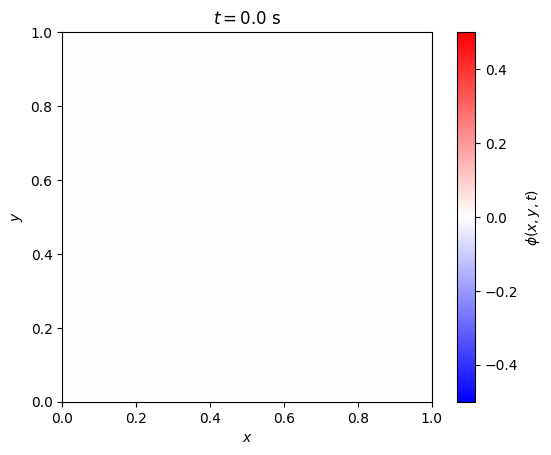

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# init setup for wave equation given in problem
Lx, Ly = 1., 1.
Nx, Ny = 256, 256
dx, dy = Lx/Nx, Ly/Ny

v = 0.1
Tmax = 20.
dt = 0.005
Nt = int(Tmax/dt)
sigma = 0.1

# initial conditions of x and y
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx, Ny))
psi = np.exp(-((X - Lx/2)**2 + (Y - Ly/2)**2) / sigma**2) # initial condition at t=0

# simulation setting
save_every = int(Nt/200)
phi_history = []

for tstep in range(Nt):
    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history.append(phi.copy())

    phi_old = phi.copy()
    psi_old = psi.copy()

    laplacian_phi = (phi_old[2:, 1:-1] + 
                     phi_old[:-2, 1:-1] +
                     phi_old[1:-1, 2:] + 
                     phi_old[1:-1, :-2] -
                     4*phi_old[1:-1, 1:-1]) / dx**2

    psi[1:-1, 1:-1] = psi_old[1:-1, 1:-1] + dt * v**2 * laplacian_phi
    phi = phi_old + dt * psi_old
    
    # Apply boundary conditions, all boundaries fixed to 0
    phi[0, :], phi[-1, :], phi[:, 0], phi[:, -1] = 0, 0, 0, 0
    psi[0, :], psi[-1, :], psi[:, 0], psi[:, -1] = 0, 0, 0, 0


# animation setup
fig, ax = plt.subplots()
im = ax.imshow(
    phi_history[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='bwr',
    vmin=-0.5, vmax=0.5
)
ax.set_title('$t=0.0$ s')
plt.colorbar(im, ax=ax, label=r'$\phi(x,y,t)$')
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update(i):
    im.set_data(phi_history[i].T)
    ax.set_title(f'$t={(i*dt*save_every):.1f}$ s')

ani = FuncAnimation(fig, update, frames=len(phi_history), interval=100)
ani.save('Wave_equation_FTCS.mp4', dpi=300)

What happens eventually?

- Grid‑scale oscillations appear and amplify. It blows up
- It shows the checkerboard pattern and then saturating

(b) It is clear that we need to conduct a stability analysis. Discretizing the variable in space and time means that, in Fourier space, we are assuming solutions of the form
\begin{align*}
  \phi(n,m) &= \phi_0 \exp(ink\Delta x-im\omega\Delta t),\\
  \psi(n,m) &= \psi_0 \exp(ink\Delta x-im\omega\Delta t),
\end{align*}
where $m$ and $n$ are integers.

Insert these ansatz to the FTCS method and show that it yields the following linear equation
\begin{align*}
\left(\begin{array}{cc}
1-e^{-i\omega\Delta t} & \Delta t\\
-4\Delta t\frac{v^{2}}{\Delta x^{2}}\sin^{2}\left(\frac{k\Delta x}{2}\right) & 1-e^{-i\omega\Delta t}
\end{array}\right)\left(\begin{array}{c}
\phi_{0}\\
\psi_{0}
\end{array}\right)=0.
\end{align*}
(10 pts)

Let $\phi(x,t)$ be $\phi^m_n$ and $\psi(x,t)$ be $\psi^m_n$, then the given equation be
$$\phi^{m+1}_n = \phi^m_n + \Delta t \, \psi^m_n$$
$$\psi^{m+1}_n = \psi^m_n + \Delta t \frac{v^2}{(\Delta x)^2} \left[ \phi^m_{n+1} + \phi^m_{n-1} - 2\phi^m_n \right]$$

We substitute $\phi^m_n = \phi_0 e^{ink\Delta x - im\omega\Delta t}$, $\psi^m_n = \psi_0 e^{ink\Delta x - im\omega\Delta t}$ and use Euler's equation like prob 1. Then,
$$(1 - e^{-i\omega\Delta t})\phi_0 + \Delta t \, \psi_0 = 0$$
$$-4\Delta t \frac{v^2}{(\Delta x)^2} \sin^2\left(\frac{k\Delta x}{2}\right) \phi_0 + (1-e^{-i\omega\Delta t})\psi_0 = 0$$

These linear equations can be written as the matrix form

$$
\begin{pmatrix}
1-e^{-i\omega\Delta t} & \Delta t \\
-4\Delta t\frac{v^{2}}{(\Delta x)^{2}}\sin^{2}\left(\frac{k\Delta x}{2}\right) & 1-e^{-i\omega\Delta t}
\end{pmatrix}
\begin{pmatrix}
\phi_{0} \\
\psi_{0}
\end{pmatrix}
= 0
$$

Thus, this complete the proof of (b)


(c) Show that a non-trivial solution exists only if
\begin{align*}
  (1-e^{-i\omega\Delta t})^2 + 4\Delta t^2 \frac{v^2}{\Delta x^2}\sin^2\left(\frac{k\Delta x}{2}\right)=0,
\end{align*}
which is the "numerical dispersion relation." For a given $k$, the solution for $\omega$ is in general complex. This means that there will be solutions that exponentially grow in time, i.e., that are numerically unstable. Thus, unfortunately, FTCS is ALWAYS unstable for the wave equation.
(5 pts)

To non-trivial solution exist, the determinant of the above matrix must be zero. So,

$$
\det\begin{pmatrix}
1-e^{-i\omega\Delta t} & \Delta t \\
-4\Delta t\frac{v^{2}}{(\Delta x)^{2}}\sin^{2}\left(\frac{k\Delta x}{2}\right) & 1-e^{-i\omega\Delta t}
\end{pmatrix} = (1-e^{-i\omega\Delta t})^2 + 4\Delta t^2 \frac{v^2}{(\Delta x)^2}\sin^2\left(\frac{k\Delta x}{2}\right) = 0
$$

To analyze stability, we must check the magnitude of the amplification

$$
e^{-i\omega\Delta t} = 1 \pm i \left( 2\Delta t \frac{v}{\Delta x}\sin\left(\frac{k\Delta x}{2}\right) \right)
$$

The squared magnitude of complex number is:
$$
|e^{-i\omega\Delta t}|^2 = 1^2 + \left( 2\Delta t \frac{v}{\Delta x}\sin\left(\frac{k\Delta x}{2}\right) \right)^2
$$

For any non-zero wave number $k$ and $\Delta t$, the second term is strictly positive. Thus, $|e^{-i\omega\Delta t}| > 1$. This means that the amplitude of every mode grows exponentially in time, proving that the FTCS method is unstable for the wave equation.

This complete the proof of (c)


(d) Instead, let us use the leapfrog method defined by
\begin{align*}
  \phi(x,t+\Delta t) &= \phi(x,t) + \Delta t \psi(x,t+\frac{1}{2}\Delta t),\\
  \psi(x,t+\frac{3}{2}\Delta t) &= \psi(x,t+\frac{1}{2}\Delta t) + \Delta t \frac{v^2}{\Delta x^2}\left[\phi(x+\Delta x,t+\Delta t)+\phi(x-\Delta x,t+\Delta t) -2 \phi(x,t+\Delta t)\right].
\end{align*}
By performing a similar stability analysis, show that the numerical dispersion relation is
\begin{align*}
  \sin^2\left(\frac{\omega\Delta t}{2}\right) = \Delta t^2 \frac{v^2}{\Delta x^2}\sin^2\left(\frac{k\Delta x}{2}\right).
\end{align*}
Explain why for the algorithm to be numerically stable, the condition
\begin{align*}
  \Delta t < \frac{\Delta x}{v}
\end{align*}
needs to be satisfied.

For two dimensions, it is trivial to show that the condition is $\Delta t < \Delta r/ v$ where $\Delta r$ is defined in Problem 1. (10 pts)


Let $\phi$ be $\phi_0 e^{i(kx - \omega t)}$ and $\psi$ be $\psi_0 e^{i(kx - \omega (t+\frac{1}{2}\Delta t))}$

Substitute these into the first leapfrog equation then
$$
\phi_0 e^{i(kx - \omega (t+\Delta t))} = \phi_0 e^{i(kx - \omega t)} + \Delta t \psi_0 e^{i(kx - \omega (t+\frac{1}{2}\Delta t))}
$$

$$
\phi_0 e^{-i\omega \Delta t} = \phi_0 + \Delta t \psi_0 e^{-i\omega \Delta t/2}
$$

$$
\phi_0 (e^{-i\omega \Delta t} - 1) = \Delta t \psi_0 e^{-i\omega \Delta t/2}
$$

Since $e^{-i\omega \Delta t} - 1 = e^{-i\omega \Delta t/2}(e^{-i\omega \Delta t/2} - e^{i\omega \Delta t/2}) = -2i e^{-i\omega \Delta t/2} \sin(\omega \Delta t/2)$ holds, we have

$$
\phi_0 (-2i e^{-i\omega \Delta t/2} \sin(\omega \Delta t/2)) = \Delta t \psi_0 e^{-i\omega \Delta t/2}
$$

$$
-2i \sin(\frac{\omega\Delta t}{2}) \phi_0 = \Delta t \psi_0
$$


Next, substitute these into the second leapfrog equation then
$$
\psi_0 e^{i(kx - \omega(t+\frac{3}{2}\Delta t))} = \psi_0 e^{i(kx - \omega(t+\frac{1}{2}\Delta t))} + \Delta t \frac{v^2}{\Delta x^2} \left[ \phi_0 e^{i(k(x+\Delta x) - \omega(t+\Delta t))} + \phi_0 e^{i(k(x-\Delta x) - \omega(t+\Delta t))} - 2 \phi_0 e^{i(k(x) - \omega(t+\Delta t))}\right]
$$

$$
\psi_0 (e^{-i\omega\Delta t} - 1) = \Delta t \frac{v^2}{\Delta x^2} \phi_0 \left( \frac{e^{i(kx - \omega t - \omega\Delta t)}}{e^{i(kx - \omega t - \omega\Delta t/2)}} \right) [e^{ik\Delta x} + e^{-ik\Delta x} - 2]
$$

$$
\psi_0 (e^{-i\omega\Delta t} - 1) = -4\Delta t \frac{v^2}{\Delta x^2} \sin^2(\frac{k\Delta x}{2}) \phi_0 e^{-i\omega \Delta t/2}
$$

$$
\psi_0 (-2i e^{-i\omega \Delta t/2} \sin(\frac{\omega \Delta t}{2})) = -4\Delta t \frac{v^2}{\Delta x^2} \sin^2(\frac{k\Delta x}{2}) \phi_0 e^{-i\omega \Delta t/2}
$$

$$
i \sin(\frac{\omega \Delta t}{2}) \psi_0 = 2\Delta t \frac{v^2}{\Delta x^2} \sin^2(\frac{k\Delta x}{2}) \phi_0
$$

$$
i \sin(\frac{\omega \Delta t}{2}) \left( \frac{-2i \sin(\frac{\omega\Delta t}{2})}{\Delta t} \phi_0 \right) = 2\Delta t \frac{v^2}{\Delta x^2} \sin^2(\frac{k\Delta x}{2}) \phi_0
$$

$$
\frac{2 \sin^2(\frac{\omega\Delta t}{2})}{\Delta t} \phi_0 = 2\Delta t \frac{v^2}{\Delta x^2} \sin^2(\frac{k\Delta x}{2}) \phi_0
$$

$$
\sin^2\left(\frac{\omega\Delta t}{2}\right) = \Delta t^2 \frac{v^2}{\Delta x^2}\sin^2\left(\frac{k\Delta x}{2}\right)
$$

We show the numericl dispersion relation.

For stability, the amplitude of a wave mode cannot grow exponentially with time. So, all of the first, the frequency $\omega$ must be a real number then
$$
\sin\left(\frac{\omega\Delta t}{2}\right) = \pm \frac{v\Delta t}{\Delta x}\sin\left(\frac{k\Delta x}{2}\right)
$$

If $\omega$ is real, RHS of above must be a real between -1 and 1
$$
\left| \frac{v\Delta t}{\Delta x}\sin\left(\frac{k\Delta x}{2}\right) \right| \le 1
$$

To satisfy for all possible mode, it must follow

$$
\left| \frac{v\Delta t}{\Delta x} \right| \le 1
$$

Since $v$, $\Delta t$, and $\Delta x$ are all positive physical quantities, in practice, a strict inequality holds
$$
\Delta t < \frac{\Delta x}{v}
$$

This complete the proof of (d)

(e) Numerically solve the same wave equation system using the leapfrog method by choosing a timestep that satisfies the stability condition, e.g., $\Delta t = 0.95 \Delta r /v$. (20pts)

Time step 0/762
Time step 3/762
Time step 6/762
Time step 9/762
Time step 12/762
Time step 15/762
Time step 18/762
Time step 21/762
Time step 24/762
Time step 27/762
Time step 30/762
Time step 33/762
Time step 36/762
Time step 39/762
Time step 42/762
Time step 45/762
Time step 48/762
Time step 51/762
Time step 54/762
Time step 57/762
Time step 60/762
Time step 63/762
Time step 66/762
Time step 69/762
Time step 72/762
Time step 75/762
Time step 78/762
Time step 81/762
Time step 84/762
Time step 87/762
Time step 90/762
Time step 93/762
Time step 96/762
Time step 99/762
Time step 102/762
Time step 105/762
Time step 108/762
Time step 111/762
Time step 114/762
Time step 117/762
Time step 120/762
Time step 123/762
Time step 126/762
Time step 129/762
Time step 132/762
Time step 135/762
Time step 138/762
Time step 141/762
Time step 144/762
Time step 147/762
Time step 150/762
Time step 153/762
Time step 156/762
Time step 159/762
Time step 162/762
Time step 165/762
Time step 168/762
Time step 17

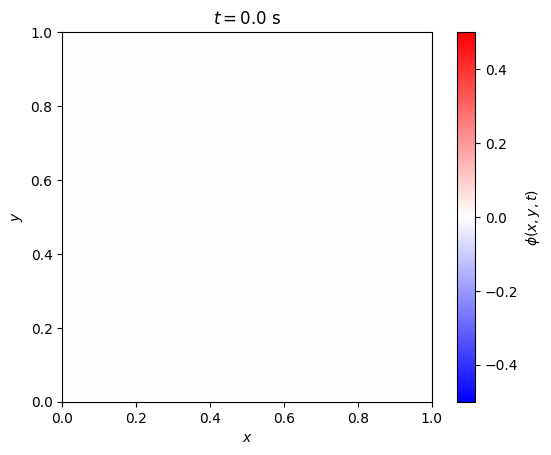

In [6]:
# setting given in problem
Lx, Ly = 1., 1.
Nx, Ny = 256, 256
dx, dy = Lx/Nx, Ly/Ny

v = 0.1
Tmax = 20.
sigma = 0.1

dr = (dx**-2 + dy**-2)**-0.5
dt = 0.95 * dr / v
Nt = int(Tmax/dt)

# initial conditions of x and y
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx, Ny))
psi = np.exp(-((X - Lx/2)**2 + (Y - Ly/2)**2) / sigma**2)

# initial leapfrog half-step setting
laplacian_phi_t0 = (phi[2:, 1:-1] + 
                    phi[:-2, 1:-1] +
                    phi[1:-1, 2:] + 
                    phi[1:-1, :-2] -
                    4*phi[1:-1, 1:-1]) / dx**2
psi[1:-1, 1:-1] += (dt / 2.0) * v**2 * laplacian_phi_t0

# simulation setting
save_every = int(Nt / 200)
phi_history = [phi.copy()]

for tstep in range(Nt):
    phi[1:-1, 1:-1] += dt * psi[1:-1, 1:-1]

    laplacian_phi_tp1 = (phi[2:, 1:-1] + 
                         phi[:-2, 1:-1] +
                         phi[1:-1, 2:] + 
                         phi[1:-1, :-2] -
                         4*phi[1:-1, 1:-1]) / dx**2
    psi[1:-1, 1:-1] += dt * v**2 * laplacian_phi_tp1

    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history.append(phi.copy())

    # Apply boundary conditions, all boundaries fixed to 0
    phi[0, :], phi[-1, :], phi[:, 0], phi[:, -1] = 0, 0, 0, 0
    psi[0, :], psi[-1, :], psi[:, 0], psi[:, -1] = 0, 0, 0, 0

# animation setup
fig, ax = plt.subplots()
im = ax.imshow(
    phi_history[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='bwr',
    vmin=-0.5, vmax=0.5
)
ax.set_title('$t=0.0$ s')
plt.colorbar(im, ax=ax, label=r'$\phi(x,y,t)$')
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update(i):
    im.set_data(phi_history[i].T)
    ax.set_title(f'$t={(i*dt*save_every):.1f}$ s')

ani = FuncAnimation(fig, update, frames=len(phi_history), interval=100)
ani.save('Wave_equation_Leapfrog_stable.mp4', dpi=300)

(f) Set $\Delta t=1.01\Delta r /v$ and rerun the simulation, and save the file as 'Wave_equation_Leapfrog_unstable.mp4'. What do you expect and what happens? (10pts)

Time step 0/716
Time step 3/716
Time step 6/716
Time step 9/716
Time step 12/716
Time step 15/716
Time step 18/716
Time step 21/716
Time step 24/716
Time step 27/716
Time step 30/716
Time step 33/716
Time step 36/716
Time step 39/716
Time step 42/716
Time step 45/716
Time step 48/716
Time step 51/716
Time step 54/716
Time step 57/716
Time step 60/716
Time step 63/716
Time step 66/716
Time step 69/716
Time step 72/716
Time step 75/716
Time step 78/716
Time step 81/716
Time step 84/716
Time step 87/716
Time step 90/716
Time step 93/716
Time step 96/716
Time step 99/716
Time step 102/716
Time step 105/716
Time step 108/716
Time step 111/716
Time step 114/716
Time step 117/716
Time step 120/716
Time step 123/716
Time step 126/716
Time step 129/716
Time step 132/716
Time step 135/716
Time step 138/716
Time step 141/716
Time step 144/716
Time step 147/716
Time step 150/716
Time step 153/716
Time step 156/716
Time step 159/716
Time step 162/716
Time step 165/716
Time step 168/716
Time step 17

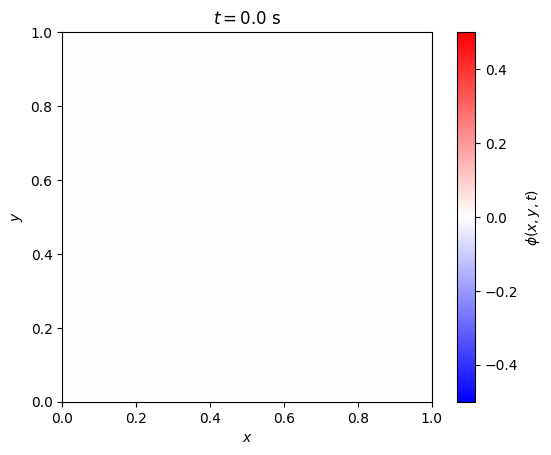

In [7]:
# setting given in problem
Lx, Ly = 1., 1.
Nx, Ny = 256, 256
dx, dy = Lx/Nx, Ly/Ny

v = 0.1
Tmax = 20.
sigma = 0.1

dr = (dx**-2 + dy**-2)**-0.5
dt = 1.01 * dr / v
Nt = int(Tmax/dt)

# initial conditions of x and y
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx, Ny))
psi = np.exp(-((X - Lx/2)**2 + (Y - Ly/2)**2) / sigma**2)

# initial leapfrog half-step setting
laplacian_phi_t0 = (phi[2:, 1:-1] + 
                    phi[:-2, 1:-1] +
                    phi[1:-1, 2:] + 
                    phi[1:-1, :-2] -
                    4*phi[1:-1, 1:-1]) / dx**2
psi[1:-1, 1:-1] += (dt / 2.0) * v**2 * laplacian_phi_t0

# simulation setting
save_every = int(Nt / 200)
phi_history = [phi.copy()]

for tstep in range(Nt):
    phi[1:-1, 1:-1] += dt * psi[1:-1, 1:-1]

    laplacian_phi_tp1 = (phi[2:, 1:-1] + 
                         phi[:-2, 1:-1] +
                         phi[1:-1, 2:] + 
                         phi[1:-1, :-2] -
                         4*phi[1:-1, 1:-1]) / dx**2
    psi[1:-1, 1:-1] += dt * v**2 * laplacian_phi_tp1

    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history.append(phi.copy())
    
    # apply boundary conditions, all boundaries fixed to 0
    phi[0, :], phi[-1, :], phi[:, 0], phi[:, -1] = 0, 0, 0, 0
    psi[0, :], psi[-1, :], psi[:, 0], psi[:, -1] = 0, 0, 0, 0

# animation setup
fig, ax = plt.subplots()
im = ax.imshow(
    phi_history[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='bwr',
    vmin=-0.5, vmax=0.5
)
ax.set_title('$t=0.0$ s')
plt.colorbar(im, ax=ax, label=r'$\phi(x,y,t)$')
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update(i):
    im.set_data(phi_history[i].T)
    ax.set_title(f'$t={(i*dt*save_every):.1f}$ s')

ani = FuncAnimation(fig, update, frames=len(phi_history), interval=100)
ani.save('Wave_equation_Leapfrog_unstable.mp4', dpi=300)



What do you expect and what happens?
- I expect that this choice of 1.01 > 1, the grid-scale perturbation grow fastly and blows up.
- Initial waves propagate first, and then checkerboard pattern appeared. 
- Amplitudes grow unbounded

(g) Let us now try changing the boundary conditions. A common boundary condition is what is called a "periodic boundary condition," which means the value at the left boundary is equal to the rightmost value, etc, so that the domain repeats itself in all directions. In other words,
\begin{align*}
  \phi(0,y) &= \phi(L-\Delta x,y),\\
  \phi(L,y) &= \phi(\Delta x,y),\\
  \phi(x,0) &= \phi(x,L-\Delta y),\\
  \phi(x,L) &= \phi(x,\Delta y).
\end{align*}
Implement the periodic boundary condition for the wave equation using the leapfrog method, and this time plot the result in 3D using the plt.plot_surface function and save the result as 'Wave_equation_Leapfrog_periodic_3D.mp4'. Briefly describe in words what is happening and the difference from the previous boundary case. (25 pts)

Time step 3/762
Time step 6/762
Time step 9/762
Time step 12/762
Time step 15/762
Time step 18/762
Time step 21/762
Time step 24/762
Time step 27/762
Time step 30/762
Time step 33/762
Time step 36/762
Time step 39/762
Time step 42/762
Time step 45/762
Time step 48/762
Time step 51/762
Time step 54/762
Time step 57/762
Time step 60/762
Time step 63/762
Time step 66/762
Time step 69/762
Time step 72/762
Time step 75/762
Time step 78/762
Time step 81/762
Time step 84/762
Time step 87/762
Time step 90/762
Time step 93/762
Time step 96/762
Time step 99/762
Time step 102/762
Time step 105/762
Time step 108/762
Time step 111/762
Time step 114/762
Time step 117/762
Time step 120/762
Time step 123/762
Time step 126/762
Time step 129/762
Time step 132/762
Time step 135/762
Time step 138/762
Time step 141/762
Time step 144/762
Time step 147/762
Time step 150/762
Time step 153/762
Time step 156/762
Time step 159/762
Time step 162/762
Time step 165/762
Time step 168/762
Time step 171/762
Time step 

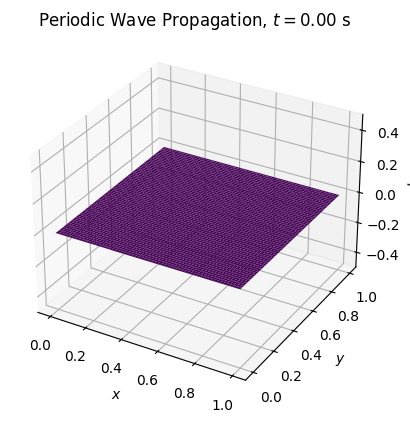

In [8]:
# setting given in problem
Lx, Ly = 1., 1.
Nx, Ny = 256, 256
dx, dy = Lx/Nx, Ly/Ny

v = 0.1
Tmax = 20.
sigma = 0.1

dr = (dx**-2 + dy**-2)**-0.5
dt = 0.95 * dr / v
Nt = int(Tmax/dt)

# initial conditions of x and y
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx, Ny))
psi = np.exp(-((X - Lx/2)**2 + (Y - Ly/2)**2) / sigma**2)

# for handling the periodic boundaries, use np.roll
laplacian_phi = (np.roll(phi, -1, axis=0) + 
                 np.roll(phi, 1, axis=0) +
                 np.roll(phi, -1, axis=1) + 
                 np.roll(phi, 1, axis=1) -
                 4*phi) / dx**2
psi += (dt / 2.0) * v**2 * laplacian_phi

# simulation setting
save_every = int(Nt / 200)
phi_history_3d = [phi.copy()]

for tstep in range(Nt):
    phi += dt * psi
    laplacian_phi = (np.roll(phi, -1, axis=0) + 
                     np.roll(phi, 1, axis=0) +
                     np.roll(phi, -1, axis=1) + 
                     np.roll(phi, 1, axis=1) -
                     4*phi) / dx**2
    psi += dt * v**2 * laplacian_phi

    if (tstep + 1) % save_every == 0:
        print(f'Time step {tstep+1}/{Nt}')
        phi_history_3d.append(phi.copy())

# animation setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update_3d(i):
    ax.cla()
    Z = phi_history_3d[i]
    ax.plot_surface(X, Y, Z, cmap='viridis', rstride=4, cstride=4, antialiased=True)
    ax.set_zlim(-0.5, 0.5)
    ax.set_xlabel('$x$'), ax.set_ylabel('$y$'), ax.set_zlabel(r'$\phi$')
    time = i * dt * save_every
    ax.set_title(f'Periodic Wave Propagation, $t={time:.2f}$ s')

ani_3d = FuncAnimation(fig, update_3d, frames=len(phi_history_3d), interval=50)
ani_3d.save('Wave_equation_Leapfrog_periodic_3D.mp4', dpi=100)

Briefly describe in words what is happening and the difference from the previous boundary case.
- The pulse generate circular waves that propagate outward, and reentering from the opposite side after traversing the boundary
- The amplitude remains approximately constant in limited range but exhibite slight distortion
- (before) fixed boundary reflects the waves back into the domain so it produce interference and standing patterns near edges
- (now) periodic boudnary produce no reflections. So, waves wrap around seamlessly and keep porpagating